In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("features_with_meta_and_target.csv")

print(df.shape)
df.head()

(2084, 24)


,subject,exercise_id,trial,imu_len,emg_len,len_ratio_emg_imu,imu_accmag_mean,imu_accmag_std,imu_accmag_max,imu_accmag_p95,...,emg_ch0_env_mean,emg_ch0_env_std,emg_ch0_env_max,emg_ch0_env_p95,emg_global_env_mean,emg_global_env_std,emg_global_env_max,emg_global_env_p95,exercise_type,is_correct
0,1,0,1,448,3808,8.5,0.999222,0.098902,1.442623,1.131357,...,0.011200,0.010289,0.037874,0.033728,0.012837,0.009930,0.041420,0.033819,squat,1
1,1,0,2,496,4216,8.5,1.002206,0.103702,1.338406,1.146115,...,0.009190,0.007733,0.032042,0.024040,0.012490,0.011031,0.048033,0.036518,squat,1
2,1,0,3,468,3978,8.5,1.000151,0.080868,1.268263,1.105984,...,0.010828,0.009748,0.036509,0.031314,0.013111,0.010204,0.037347,0.030871,squat,1
3,1,0,4,476,4046,8.5,1.003110,0.094185,1.230914,1.118336,...,0.010438,0.010127,0.043413,0.034380,0.014028,0.011856,0.046266,0.036993,squat,1
4,1,0,5,484,4114,8.5,1.003883,0.086680,1.233887,1.101139,...,0.009087,0.008685,0.035427,0.027361,0.011306,0.008768,0.031054,0.028314,squat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              2084 non-null   int64  
 1   exercise_id          2084 non-null   int64  
 2   trial                2084 non-null   int64  
 3   imu_len              2084 non-null   int64  
 4   emg_len              2084 non-null   int64  
 5   len_ratio_emg_imu    2084 non-null   float64
 6   imu_accmag_mean      2084 non-null   float64
 7   imu_accmag_std       2084 non-null   float64
 8   imu_accmag_max       2084 non-null   float64
 9   imu_accmag_p95       2084 non-null   float64
 10  imu_gyromag_mean     2084 non-null   float64
 11  imu_gyromag_std      2084 non-null   float64
 12  imu_gyromag_max      2084 non-null   float64
 13  imu_gyromag_p95      2084 non-null   float64
 14  emg_ch0_env_mean     2084 non-null   float64
 15  emg_ch0_env_std      2084 non-null   f

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject,2084.0,16.071497,8.878179,1.000000,8.000000,16.000000,24.000000,31.000000
exercise_id,2084.0,2.478887,2.048625,0.000000,0.000000,2.000000,4.000000,8.000000
trial,2084.0,6.892994,5.019651,1.000000,3.000000,6.000000,9.000000,32.000000
imu_len,2084.0,619.240883,353.307099,222.000000,487.500000,562.000000,640.000000,4622.000000
emg_len,2084.0,5263.468330,3002.544224,1888.000000,4143.750000,4777.000000,5440.000000,39284.000000
len_ratio_emg_imu,2084.0,8.500054,0.001113,8.497115,8.500000,8.500000,8.500000,8.517647
imu_accmag_mean,2084.0,0.979816,0.026643,0.944471,0.953300,0.983894,0.998646,1.146764
imu_accmag_std,2084.0,0.058864,0.046784,0.002789,0.031712,0.051580,0.076335,0.403794
imu_accmag_max,2084.0,1.283731,0.314971,0.955782,1.076453,1.198583,1.392120,3.080177
imu_accmag_p95,2084.0,1.067713,0.098946,0.951251,1.016564,1.054764,1.095023,1.898004


In [5]:
# Valores nulos
df.isna().sum().sort_values(ascending=False)

subject                0
exercise_id            0
exercise_type          0
emg_global_env_p95     0
emg_global_env_max     0
emg_global_env_std     0
emg_global_env_mean    0
emg_ch0_env_p95        0
emg_ch0_env_max        0
emg_ch0_env_std        0
emg_ch0_env_mean       0
imu_gyromag_p95        0
imu_gyromag_max        0
imu_gyromag_std        0
imu_gyromag_mean       0
imu_accmag_p95         0
imu_accmag_max         0
imu_accmag_std         0
imu_accmag_mean        0
len_ratio_emg_imu      0
emg_len                0
imu_len                0
trial                  0
is_correct             0
dtype: int64

In [6]:
# Distribución de la variable objetivo
df["is_correct"].value_counts()

0    1223
1     861
Name: is_correct, dtype: int64

In [7]:
df["is_correct"].value_counts(normalize=True)

0    0.586852
1    0.413148
Name: is_correct, dtype: float64

In [8]:
df["exercise_type"].value_counts()

squat      1075
sle         914
walking      95
Name: exercise_type, dtype: int64

In [9]:
pd.crosstab(df["exercise_type"], df["is_correct"])

is_correct,0,1
exercise_type,,
sle,620,294
squat,545,530
walking,58,37


In [10]:
df.groupby("subject").size().describe()

count    31.000000
mean     67.225806
std      14.602990
min      20.000000
25%      64.000000
50%      72.000000
75%      75.500000
max      83.000000
dtype: float64

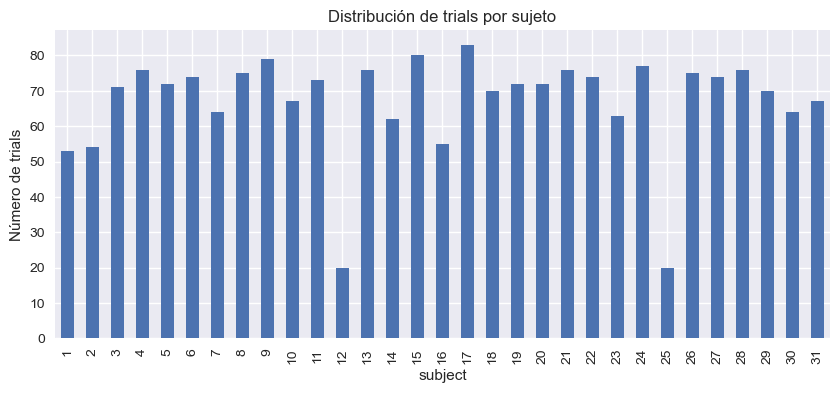

In [11]:
plt.figure(figsize=(10,4))
df.groupby("subject").size().plot(kind="bar")
plt.ylabel("Número de trials")
plt.title("Distribución de trials por sujeto")
plt.show()

In [12]:
feature_cols = [
    c for c in df.columns
    if c.startswith("imu_") or c.startswith("emg_")
]

len(feature_cols), feature_cols

(18,
 ['imu_len',
  'emg_len',
  'imu_accmag_mean',
  'imu_accmag_std',
  'imu_accmag_max',
  'imu_accmag_p95',
  'imu_gyromag_mean',
  'imu_gyromag_std',
  'imu_gyromag_max',
  'imu_gyromag_p95',
  'emg_ch0_env_mean',
  'emg_ch0_env_std',
  'emg_ch0_env_max',
  'emg_ch0_env_p95',
  'emg_global_env_mean',
  'emg_global_env_std',
  'emg_global_env_max',
  'emg_global_env_p95'])

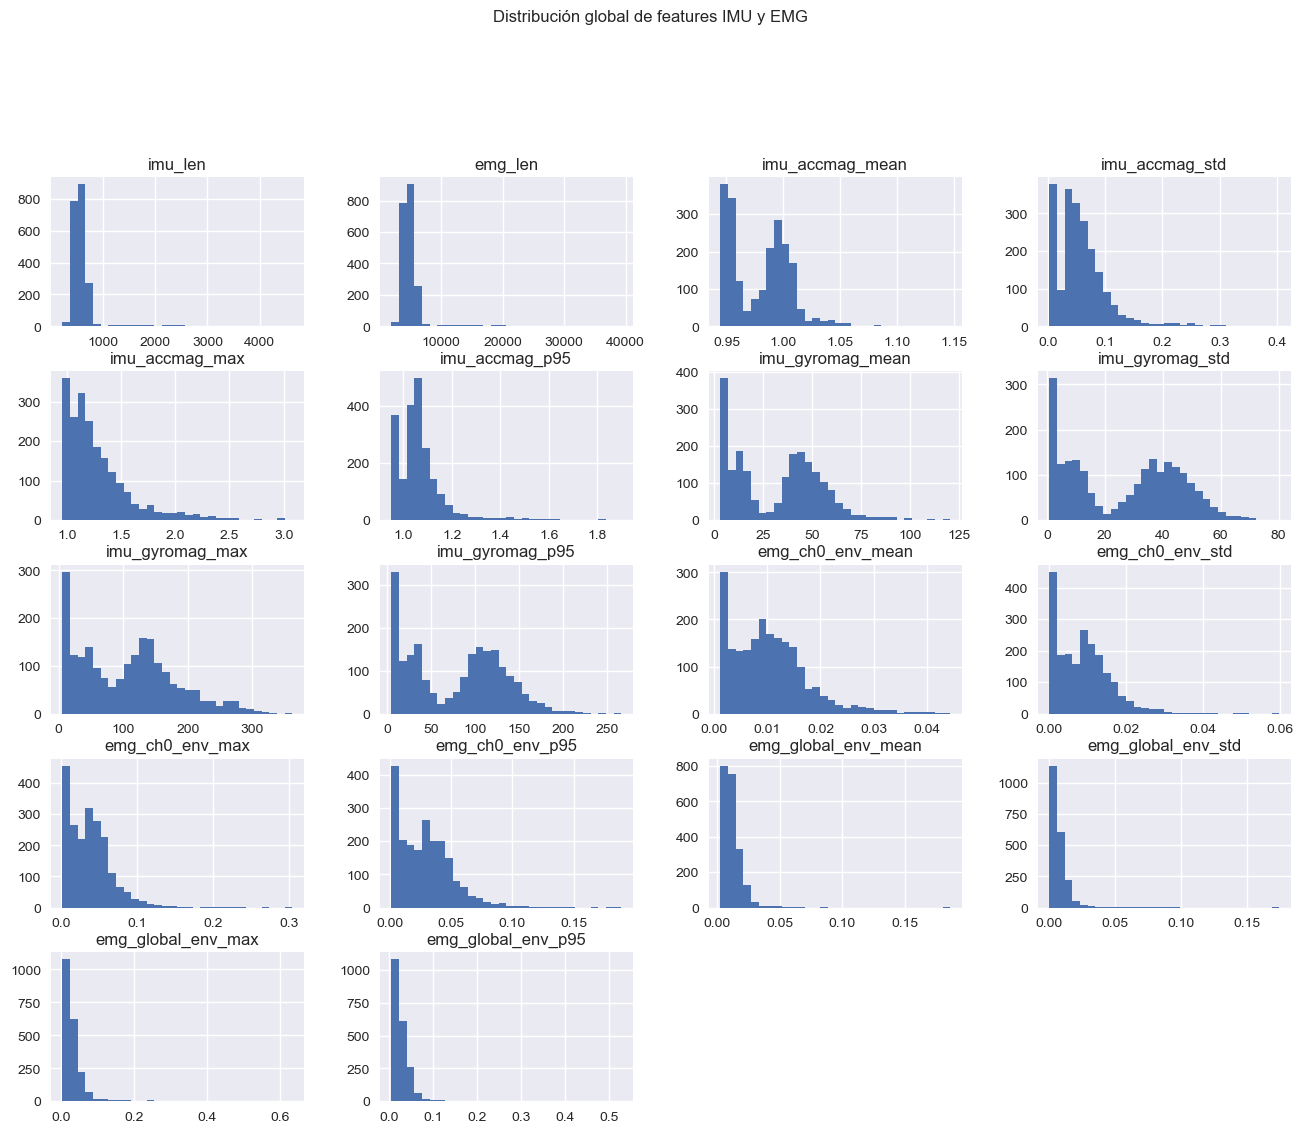

In [14]:
df[feature_cols].hist(
    figsize=(16, 12),
    bins=30
)
plt.suptitle("Distribución global de features IMU y EMG", y=1.02)
plt.show()

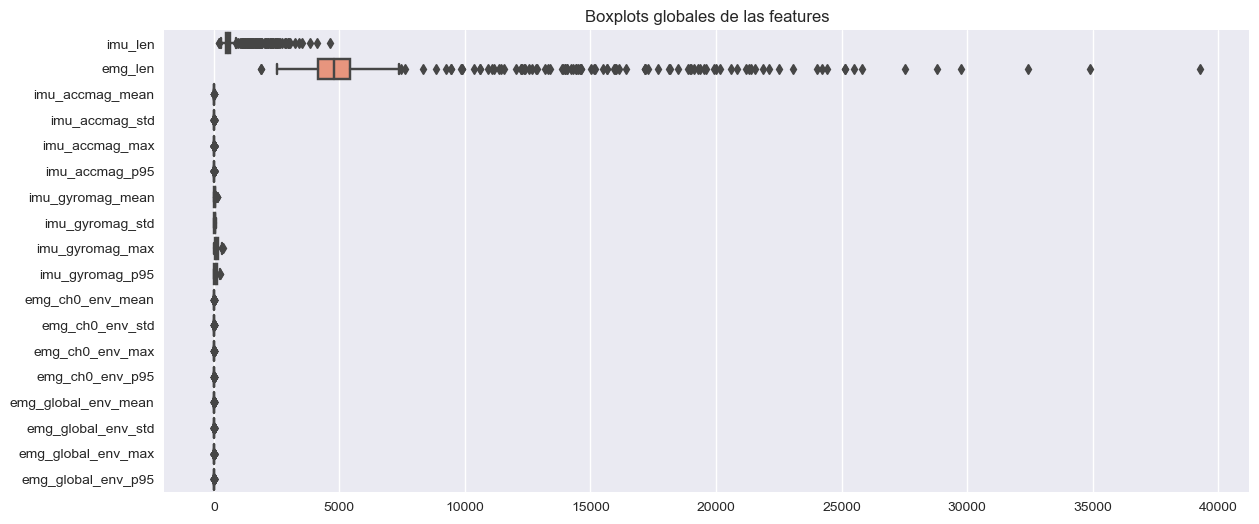

In [15]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[feature_cols], orient="h")
plt.title("Boxplots globales de las features")
plt.show()

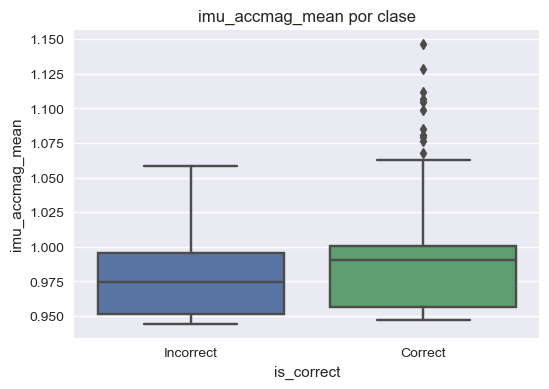

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="is_correct", y="imu_accmag_mean", data=df)
plt.xticks([0,1], ["Incorrect", "Correct"])
plt.title("imu_accmag_mean por clase")
plt.show()

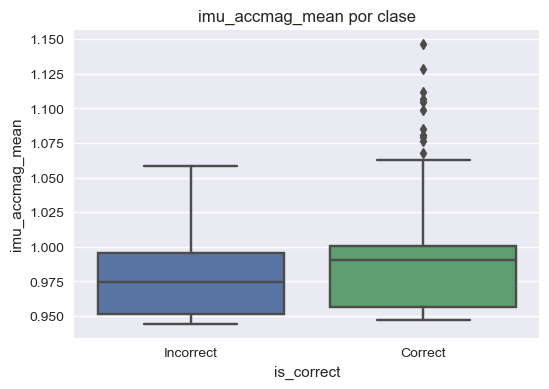

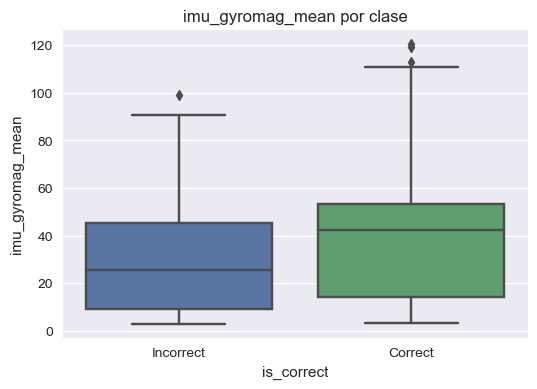

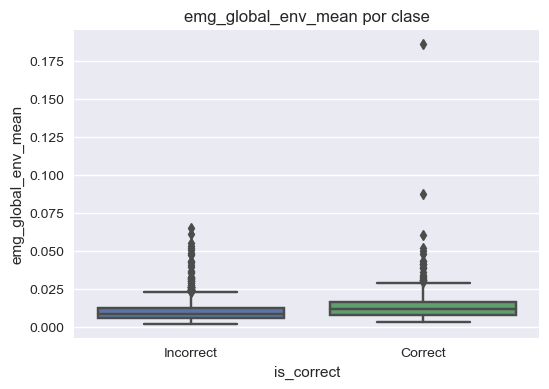

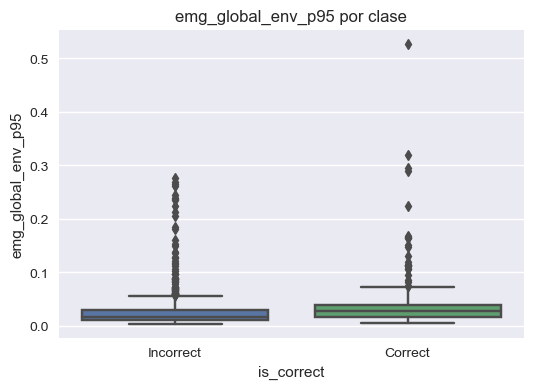

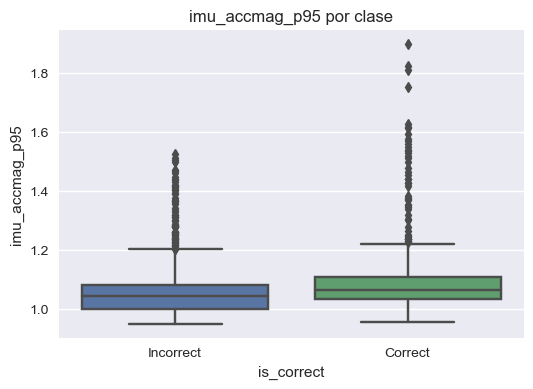

In [17]:
top_feats = [
    "imu_accmag_mean",
    "imu_gyromag_mean",
    "emg_global_env_mean",
    "emg_global_env_p95",
    "imu_accmag_p95",
]

for f in top_feats:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="is_correct", y=f, data=df)
    plt.xticks([0,1], ["Incorrect", "Correct"])
    plt.title(f"{f} por clase")
    plt.show()

In [18]:
df_sle = df[df["exercise_type"] == "sle"]
pd.crosstab(df_sle["is_correct"], df_sle["exercise_id"])

exercise_id,3,4,5
is_correct,,,
0,0,285,335
1,294,0,0


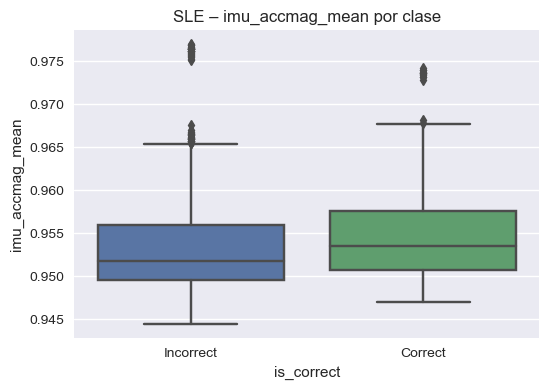

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x="is_correct", y="imu_accmag_mean", data=df_sle)
plt.xticks([0,1], ["Incorrect", "Correct"])
plt.title("SLE – imu_accmag_mean por clase")
plt.show()

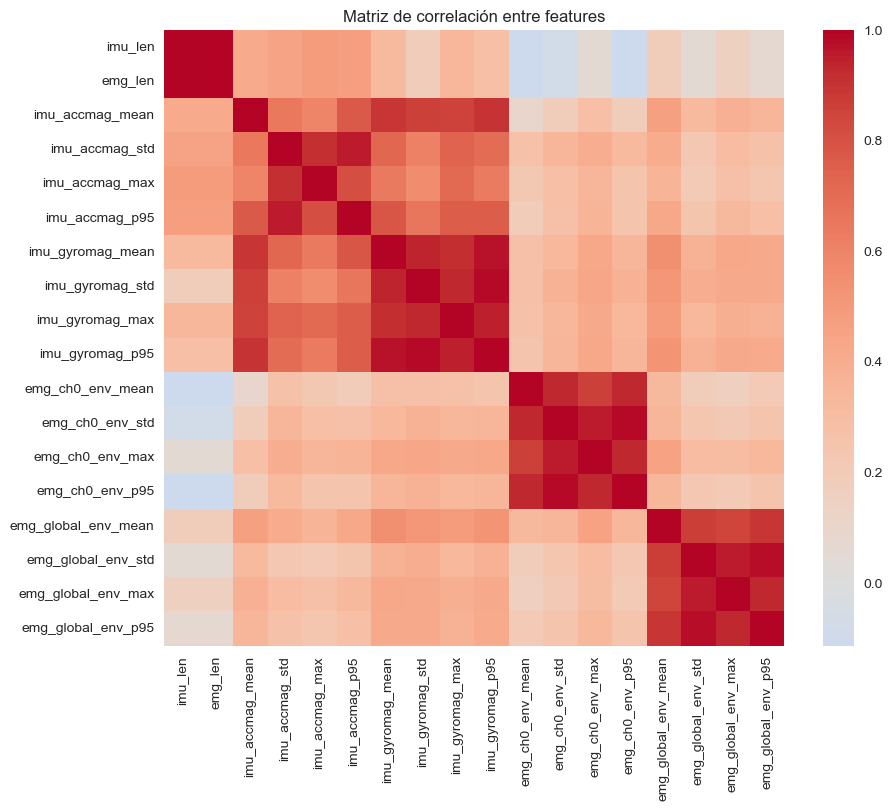

In [20]:
corr = df[feature_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre features")
plt.show()

In [21]:
df_walking = df[df["exercise_type"] == "walking"]
pd.crosstab(df_walking["is_correct"], df_walking["exercise_id"])

exercise_id,6,7,8
is_correct,,,
0,0,28,30
1,37,0,0


In [4]:
df = pd.read_csv("features_trials_imu_emg.csv")

print(df.shape)
df.head()

(2084, 22)


,subject,exercise_id,trial,imu_len,emg_len,len_ratio_emg_imu,imu_accmag_mean,imu_accmag_std,imu_accmag_max,imu_accmag_p95,...,imu_gyromag_max,imu_gyromag_p95,emg_ch0_env_mean,emg_ch0_env_std,emg_ch0_env_max,emg_ch0_env_p95,emg_global_env_mean,emg_global_env_std,emg_global_env_max,emg_global_env_p95
0,1,0,1,448,3808,8.5,0.999222,0.098902,1.442623,1.131357,...,166.830407,159.905001,0.011200,0.010289,0.037874,0.033728,0.012837,0.009930,0.041420,0.033819
1,1,0,2,496,4216,8.5,1.002206,0.103702,1.338406,1.146115,...,234.507940,139.115841,0.009190,0.007733,0.032042,0.024040,0.012490,0.011031,0.048033,0.036518
2,1,0,3,468,3978,8.5,1.000151,0.080868,1.268263,1.105984,...,170.564664,150.306468,0.010828,0.009748,0.036509,0.031314,0.013111,0.010204,0.037347,0.030871
3,1,0,4,476,4046,8.5,1.003110,0.094185,1.230914,1.118336,...,216.115219,147.677125,0.010438,0.010127,0.043413,0.034380,0.014028,0.011856,0.046266,0.036993
4,1,0,5,484,4114,8.5,1.003883,0.086680,1.233887,1.101139,...,207.762999,141.153516,0.009087,0.008685,0.035427,0.027361,0.011306,0.008768,0.031054,0.028314


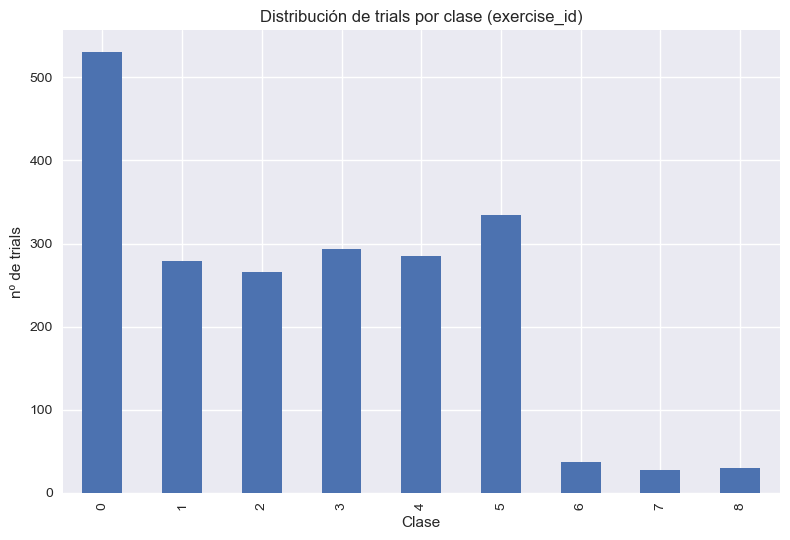

In [5]:
counts_cls = df.groupby("exercise_id").size().sort_index()
plt.figure()
counts_cls.plot(kind="bar")
plt.title("Distribución de trials por clase (exercise_id)")
plt.xlabel("Clase")
plt.ylabel("nº de trials")
plt.tight_layout()
plt.show()

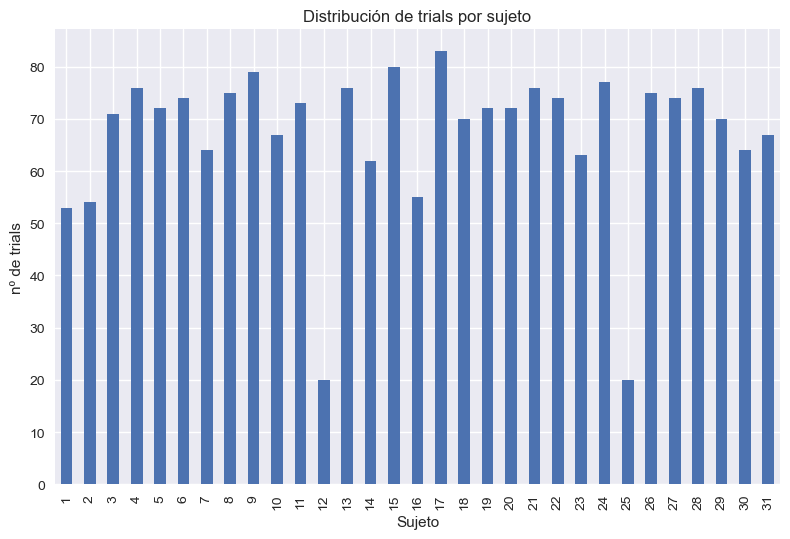

In [6]:
counts_subj = df.groupby("subject").size().sort_index()
plt.figure()
counts_subj.plot(kind="bar")
plt.title("Distribución de trials por sujeto")
plt.xlabel("Sujeto")
plt.ylabel("nº de trials")
plt.tight_layout()
plt.show()

In [17]:
meta_df = pd.read_csv("metadata.csv")
meta_df.head()
meta_df.columns

Index(['ParticipantID', 'Gender', 'Height_cm', 'Weight_kg', 'Age_yrs', 'Leg',
       'Pathology'],
      dtype='object')

In [21]:
results_loso = pd.read_csv("results_loso_baselines.csv")
results_loso.head()

,subject_left_out,model,accuracy,macro_f1,kappa
0,1,LogReg,0.528302,0.430108,-0.127660
1,1,RF,0.283019,0.261730,-0.183314
2,1,SVM-linear,0.547170,0.388462,-0.166972
3,1,SVM-rbf,0.377358,0.354374,-0.268310
4,2,LogReg,0.611111,0.379310,0.000000


In [22]:
meta_df["ParticipantID"] = meta_df["ParticipantID"].astype(int)
# 1) Asegurarnos de que Age_yrs es numérico
meta_df["Age_yrs_num"] = pd.to_numeric(meta_df["Age_yrs"], errors="coerce")
print(meta_df["Age_yrs"].head())
print(meta_df["Age_yrs_num"].head())
print(meta_df["Age_yrs_num"].isna().sum(), "valores no numéricos en Age_yrs")
# Unir resultados LOSO (por sujeto) con metadatos
results_loso_meta = results_loso.merge(
meta_df,
left_on="subject_left_out",
right_on="ParticipantID",
how="left"
)

0    27
1    47
2    56
3    48
4    31
Name: Age_yrs, dtype: int64
0    27
1    47
2    56
3    48
4    31
Name: Age_yrs_num, dtype: int64
0 valores no numéricos en Age_yrs


In [23]:
gender_summary = (
    results_loso_meta
    .groupby(["Gender", "model"])
    .agg(
        n_subjects       = ("subject_left_out", "nunique"),
        accuracy_mean    = ("accuracy", "mean"),
        accuracy_std     = ("accuracy", "std"),
        macro_f1_mean    = ("macro_f1", "mean"),
        macro_f1_std     = ("macro_f1", "std"),
        kappa_mean       = ("kappa", "mean"),
        kappa_std        = ("kappa", "std"),
    )
    .reset_index()
)

display(gender_summary)

,Gender,model,n_subjects,accuracy_mean,accuracy_std,macro_f1_mean,macro_f1_std,kappa_mean,kappa_std
0,Female,LogReg,18,0.611030,0.075439,0.491428,0.098682,0.090029,0.156910
1,Female,RF,18,0.633011,0.079874,0.572470,0.120851,0.204405,0.194744
2,Female,SVM-linear,18,0.607584,0.070386,0.462261,0.092800,0.064892,0.119686
3,Female,SVM-rbf,18,0.625340,0.087803,0.532265,0.118898,0.144572,0.165119
4,Male,LogReg,13,0.640884,0.069931,0.588664,0.110542,0.220672,0.198781
5,Male,RF,13,0.597496,0.142028,0.545386,0.162148,0.177916,0.249983
6,Male,SVM-linear,13,0.645454,0.064116,0.580084,0.119261,0.210956,0.198913
7,Male,SVM-rbf,13,0.644898,0.119023,0.598007,0.159234,0.242813,0.278698


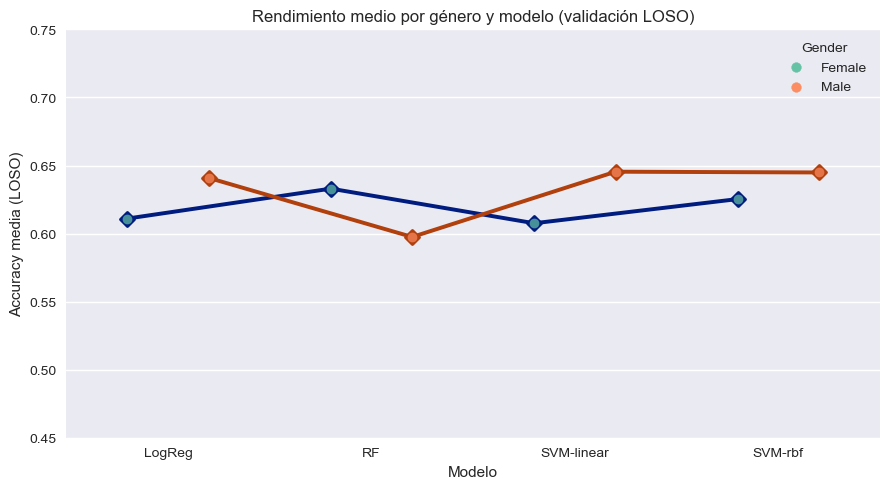

In [26]:
plt.figure(figsize=(9, 5))

# Puntos individuales
sns.stripplot(
    data=gender_summary,
    x="model",
    y="accuracy_mean",
    hue="Gender",
    dodge=True,
    jitter=0.15,
    alpha=0.7,
    size=7,
    palette="Set2"
)

# Media por grupo
sns.pointplot(
    data=gender_summary,
    x="model",
    y="accuracy_mean",
    hue="Gender",
    dodge=0.4,
    join=True,
    markers="D",
    scale=0.9,
    errwidth=0,
    errorbar=None,
    palette="dark"
)

plt.ylabel("Accuracy media (LOSO)")
plt.xlabel("Modelo")
plt.title("Rendimiento medio por género y modelo (validación LOSO)")
plt.ylim(0.45, 0.75)

# Evitar duplicar la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Gender")

plt.tight_layout()
plt.show()